In [1]:
import csv
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 10

In [2]:
from glob import glob
from pathlib import Path

In [3]:
dataset_group = sorted([x for x in Path("./dataset/raw").glob("*.npy")])
dataset_group

[WindowsPath('dataset/raw/raw_five_1670060863.npy'),
 WindowsPath('dataset/raw/raw_four_1670060863.npy'),
 WindowsPath('dataset/raw/raw_one_1670060863.npy'),
 WindowsPath('dataset/raw/raw_three_1670060863.npy'),
 WindowsPath('dataset/raw/raw_two_1670060863.npy')]

In [4]:
model_save_path = 'models/classifier.hdf5'
tflite_save_path = 'models/classifier.tflite'

In [5]:
actions = ['five', 'four', 'three', 'two', 'one']

In [6]:
data = []

In [7]:
for fle in dataset_group:
    if len(data) == 0:
        data = np.load(fle)
    else:
        data = np.concatenate([data, np.load(fle)], axis=0)

In [8]:
print(data.shape)
print(data[0])

(2629, 100)
[ 6.47246361e-01  5.50287843e-01  3.30378128e-07  0.00000000e+00
  6.80410862e-01  5.13930321e-01 -4.93880594e-03  0.00000000e+00
  6.99606001e-01  4.73457903e-01 -1.25982631e-02  0.00000000e+00
  7.11424112e-01  4.32096362e-01 -1.93794854e-02  0.00000000e+00
  7.23487496e-01  4.01319265e-01 -2.68234350e-02  0.00000000e+00
  6.54819369e-01  4.14837092e-01 -1.96651593e-02  0.00000000e+00
  6.53062999e-01  3.50154221e-01 -2.89574210e-02  0.00000000e+00
  6.50760293e-01  3.11527103e-01 -3.41069996e-02  0.00000000e+00
  6.49540782e-01  2.82753319e-01 -3.73892076e-02  0.00000000e+00
  6.28432512e-01  4.17551041e-01 -2.26669833e-02  0.00000000e+00
  6.16192997e-01  3.49861979e-01 -3.26559320e-02  0.00000000e+00
  6.08314693e-01  3.07343692e-01 -3.86209451e-02  0.00000000e+00
  6.03158295e-01  2.75574178e-01 -4.26982567e-02  0.00000000e+00
  6.04540825e-01  4.32681441e-01 -2.50353105e-02  0.00000000e+00
  5.90386331e-01  3.68584722e-01 -3.50769013e-02  0.00000000e+00
  5.82254529e

In [9]:
NUM_CLASSES = 5

In [10]:
X_dataset = data[:,0:99]
print(X_dataset)
print(X_dataset.shape)

[[ 6.47246361e-01  5.50287843e-01  3.30378128e-07 ...  7.37506151e+00
   1.88328743e+00  5.47834206e+00]
 [ 6.49556994e-01  5.57421327e-01  3.31400571e-07 ...  6.16216040e+00
   1.09553540e+00  4.24988556e+00]
 [ 6.47758842e-01  5.59856355e-01  3.24325697e-07 ...  7.36907864e+00
   1.30498755e+00  3.80929208e+00]
 ...
 [ 7.09645748e-01  6.19718850e-01 -3.67645868e-07 ...  2.48343158e+00
   1.65730133e+01  6.87379122e+00]
 [ 7.08830535e-01  6.19214058e-01 -3.65408539e-07 ...  2.52631998e+00
   1.61935883e+01  7.28246355e+00]
 [ 7.08807945e-01  6.18570089e-01 -3.57133104e-07 ...  2.70864868e+00
   1.59108086e+01  7.36292553e+00]]
(2629, 99)


In [11]:
y_dataset = data[:,99]
print(y_dataset)

[0. 0. 0. ... 3. 3. 3.]


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

In [18]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((99)),
    #tf.keras.layers.Input((99,)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_2 (Dropout)         (None, 99)                0         
                                                                 
 dense_3 (Dense)             (None, 20)                2000      
                                                                 
 dropout_3 (Dropout)         (None, 20)                0         
                                                                 
 dense_4 (Dense)             (None, 10)                210       
                                                                 
 dense_5 (Dense)             (None, 5)                 55        
                                                                 
Total params: 2,265
Trainable params: 2,265
Non-trainable params: 0
_________________________________________________________________


In [15]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)

In [16]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [17]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=120,
    validation_data=(X_test,y_test),
    callbacks=[cp_callback]
)

Epoch 1/1000


ValueError: in user code:

    File "c:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "c:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "c:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 889, in train_step
        y_pred = self(x, training=True)
    File "c:\ProgramData\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\ProgramData\Anaconda3\lib\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 1, 99), found shape=(None, 99)


In [ ]:
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=120)

6/6 [==============================] - 0s 3ms/step - loss: 0.3197 - accuracy: 0.8495


In [ ]:
model = tf.keras.models.load_model(model_save_path)

In [ ]:
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 109ms/step
[0.000000e+00 0.000000e+00 0.000000e+00 8.623461e-05 9.999138e-01]
4


## Confusion Matrix

21/21 [==============================] - 0s 2ms/step


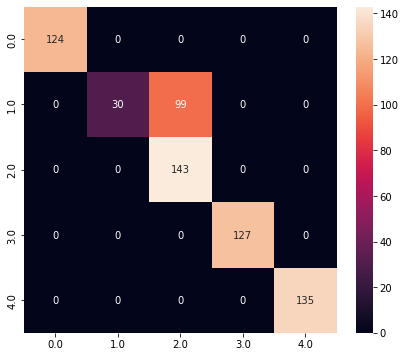

Classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       124
         1.0       1.00      0.23      0.38       129
         2.0       0.59      1.00      0.74       143
         3.0       1.00      1.00      1.00       127
         4.0       1.00      1.00      1.00       135

    accuracy                           0.85       658
   macro avg       0.92      0.85      0.82       658
weighted avg       0.91      0.85      0.82       658



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cms = pd.DataFrame(cmx_data, index=labels, columns=labels)
    
    fig, ax = plt.subplots(figsize=(7,6))
    sns.heatmap(df_cms, annot=True, fmt='g', square=False)
    ax.set_ylim(len(set(y_true)),0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))
        
Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

## Convert to model for TFlite

In [ ]:
model.save(model_save_path, include_optimizer=False)

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Public\Documents\ESTsoft\CreatorTemp\tmpkhyh8rx1\assets


5240

## Inference test

In [ ]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [ ]:
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [ ]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(input_details[0]['index'])

CPU times: total: 0 ns
Wall time: 2 ms


In [ ]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[           nan            nan  5.6051939e-45  0.0000000e+00
            nan            nan  1.4012985e-45  0.0000000e+00
            nan            nan  1.4012985e-45  0.0000000e+00
            nan            nan  1.4012985e-45  0.0000000e+00
            nan            nan  3.4972036e-15  8.1695700e-43
            nan            nan -1.1107011e+25  4.5913544e-41
            nan            nan  9.8090893e-45  0.0000000e+00
            nan            nan  2.8025969e-45  0.0000000e+00
            nan            nan  7.5495220e-14  8.1695700e-43
            nan            nan -1.5051131e+26  4.5913544e-41
            nan            nan  1.4012985e-45  0.0000000e+00
            nan            nan  2.8025969e-45  8.1695700e-43
            nan            nan  1.4012985e-45  0.0000000e+00
            nan            nan  5.6051939e-45  0.0000000e+00
            nan            nan -3.5565329e+22  4.5913544e-41
            nan            nan  1.4012985e-45  0.0000000e+00
            nan         